<a href="https://colab.research.google.com/github/souzajvp/teaching-python/blob/main/Aula06/Trabalhando_com_vari%C3%A1veis_categ%C3%B3ricas_Aula06_respostas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios da aula anterior

Lendo o banco

In [1]:
import pandas as pd 

#### 1 - Qual função é usada para lermos arquivos no formato ".csv" usando o pacote pandas?
<font color='red'>R:</font> `pd.read_csv("caminho.csv")`


In [2]:
url = 'https://raw.githubusercontent.com/souzajvp/teaching-python/main/dados_tb_pr_2016_aula05.csv'
dados = pd.read_csv(url)

#### 2 - Qual função é utilizada para exibir as primeiras linhas do nosso banco de dados? <font color='red'>Como faríamos para exibir as primeiras 4 linhas?</font>
<font color='red'>R:</font> `dados.head()`. Para imprimir as primeiras 4 linhas, poderíamos usar a função `dados.head(4)`.

In [3]:
dados.head()

,DT_NOTIFIC,ID_MUNICIP,DT_DIAG,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,ID_MN_RESI,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,AGRAVOUTDE,BACILOSC_E,BACILOS_E2,BACILOSC_O,CULTURA_ES,CULTURA_OU,HIV,HISTOPATOL,DT_INIC_TR,RIFAMPICIN,ISONIAZIDA,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6
0,2017-02-10,410690,2016-10-10,4037,M,Branca,9.0,410690,NaN,3,NaN,4.0,NaN,1,9.0,1.0,2.0,2.0,9.0,NaN,1,NaN,NaN,4,NaN,2,5.0,2017-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2017-03-06,2.0,2.0,1.0,2.0,2.0,9.0,9.0,9.0,5.0,NaN,NaN,NaN
1,2017-01-25,411370,2016-12-30,4025,F,Branca,9.0,410190,NaN,1,NaN,1.0,NaN,1,1.0,1.0,2.0,1.0,2.0,NaN,1,NaN,NaN,1,NaN,1,5.0,2017-01-25,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,1.0,2017-01-25,70.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0,6.0,1.0,NaN
2,2016-03-31,410690,2016-03-31,4031,M,Branca,9.0,411840,NaN,1,NaN,2.0,NaN,2,2.0,2.0,2.0,2.0,2.0,NaN,3,NaN,NaN,4,NaN,2,2.0,2016-03-31,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,5.0,2016-04-01,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,4.0
3,2016-11-11,410230,2016-11-07,4040,F,Branca,6.0,410230,NaN,1,NaN,1.0,NaN,1,2.0,2.0,1.0,2.0,2.0,NaN,1,NaN,NaN,3,NaN,4,5.0,2016-11-07,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,5.0,2017-05-18,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,NaN,NaN,2.0
4,2016-05-20,411210,2016-05-20,4027,M,Branca,2.0,410320,NaN,1,NaN,4.0,NaN,1,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN,NaN,1,NaN,2,5.0,2016-05-20,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,5.0,2016-06-09,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,5.0,2.0,NaN


In [4]:
dados.head(4)

,DT_NOTIFIC,ID_MUNICIP,DT_DIAG,NU_IDADE_N,CS_SEXO,CS_RACA,CS_ESCOL_N,ID_MN_RESI,ID_OCUPA_N,TRATAMENTO,INSTITUCIO,RAIOX_TORA,TESTE_TUBE,FORMA,AGRAVAIDS,AGRAVALCOO,AGRAVDIABE,AGRAVDOENC,AGRAVOUTRA,AGRAVOUTDE,BACILOSC_E,BACILOS_E2,BACILOSC_O,CULTURA_ES,CULTURA_OU,HIV,HISTOPATOL,DT_INIC_TR,RIFAMPICIN,ISONIAZIDA,BACILOSC_1,BACILOSC_2,BACILOSC_3,BACILOSC_4,BACILOSC_5,BACILOSC_6,SITUA_9_M,SITUA_12_M,SITUA_ENCE,DT_ENCERRA,TPUNINOT,POP_LIBER,POP_RUA,POP_SAUDE,POP_IMIG,BENEF_GOV,AGRAVDROGA,AGRAVTABAC,TEST_MOLEC,TEST_SENSI,ANT_RETRO,BAC_APOS_6
0,2017-02-10,410690,2016-10-10,4037,M,Branca,9.0,410690,NaN,3,NaN,4.0,NaN,1,9.0,1.0,2.0,2.0,9.0,NaN,1,NaN,NaN,4,NaN,2,5.0,2017-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2017-03-06,2.0,2.0,1.0,2.0,2.0,9.0,9.0,9.0,5.0,NaN,NaN,NaN
1,2017-01-25,411370,2016-12-30,4025,F,Branca,9.0,410190,NaN,1,NaN,1.0,NaN,1,1.0,1.0,2.0,1.0,2.0,NaN,1,NaN,NaN,1,NaN,1,5.0,2017-01-25,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,1.0,2017-01-25,70.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0,6.0,1.0,NaN
2,2016-03-31,410690,2016-03-31,4031,M,Branca,9.0,411840,NaN,1,NaN,2.0,NaN,2,2.0,2.0,2.0,2.0,2.0,NaN,3,NaN,NaN,4,NaN,2,2.0,2016-03-31,NaN,NaN,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,5.0,2016-04-01,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,4.0
3,2016-11-11,410230,2016-11-07,4040,F,Branca,6.0,410230,NaN,1,NaN,1.0,NaN,1,2.0,2.0,1.0,2.0,2.0,NaN,1,NaN,NaN,3,NaN,4,5.0,2016-11-07,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,5.0,2017-05-18,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,5.0,NaN,NaN,2.0


#### 3 - Como faríamos para verificar quantas pessoas de cada sexo (variável "CS_SEXO") tiveram TB no paraná?
<font color='red'>R:</font> Poderíamos usar a método `value_counts()`, da seguinte forma --> `dados['CS_SEXO'].value_counts()`.

In [5]:
dados['CS_SEXO'].value_counts()

M    1771
F     766
Name: CS_SEXO, dtype: int64

#### 4 - Substitua os valores "M" e "F" por "Masculino" e "Feminino" no banco de dados usando o método `.replace()`

In [6]:
dados['CS_SEXO'].replace(['M', 'F'], ['Masculino', 'Feminino'])

0       Masculino
1        Feminino
2       Masculino
3        Feminino
4       Masculino
          ...    
2532    Masculino
2533     Feminino
2534    Masculino
2535     Feminino
2536     Feminino
Name: CS_SEXO, Length: 2537, dtype: object

In [7]:
dados['CS_SEXO'] = dados['CS_SEXO'].replace(['M', 'F'], ['Masculino', 'Feminino'])

#### 5 - Por fim, salve o banco de dados com o nome "arquivo_seu_nome.csv" e envie pra mim por e-mail.

# Importando módulos e o banco de dados

In [8]:
import pandas as pd

In [9]:
url = 'https://raw.githubusercontent.com/souzajvp/teaching-python/main/dados_tb_pr_2016_aula05.csv'

Como eu já carreguei o banco ali em cima, não é necessário fazermos isso novamente

In [10]:
# dados = pd.read_csv(url)
# dados['CS_SEXO'] = dados['CS_SEXO'].replace(['M', 'F'],['Masculino', 'Feminino'])

## Escolaridade
Para preparar os dados, além do método replace, podemos usar também o método `map()`

o método `map()` recebe um dicionário

Essa é a primeira vez que aprendemos sobre dicionários do python. Basicamente, os dicionários são formas e organizarmos os dados, parecidos com as listas. A diferença é que temos pares de "chaves" e "valores".

A estrutura base de um dicionário consiste em `{chave:valor}`

In [11]:
{'nome':'João', 'sobrenome':'Souza'}

{'nome': 'João', 'sobrenome': 'Souza'}

Podemos nomear um dicionário, do mesmo jeito que fazemos com listas.

In [12]:
dicionario = {'nome':'João', 'sobrenome':'Souza'}

In [13]:
dicionario

{'nome': 'João', 'sobrenome': 'Souza'}

Para acessar os valores de um dicionário, usamos as chaves que ele possui, de forma muito parecida como fazemos com um `dataframe` do pandas.

In [14]:
dicionario['nome']

'João'

In [15]:
dicionario['nome'] + ' ' + dicionario['sobrenome']

'João Souza'

### Dicionário para substituição

In [16]:
escolaridade = {0:'Analfabeto', 1:'1ª a 4ª série incompleta do EF', 2:'4ª série completa do EF',
                3:'5ª a 8ª série incompleta do EF', 4:'Fundamental completo',
                5:'Ensino médio incompleto', 6:'Ensino médio completo',
                7:'Superior incompleto', 8:'Superior completo', 9:'Ignorado',
                10:'Não se aplica'}

Executando o método map

In [17]:
dados['CS_ESCOL_N'].map(escolaridade)

0                             Ignorado
1                             Ignorado
2                             Ignorado
3                Ensino médio completo
4              4ª série completa do EF
                     ...              
2532              Fundamental completo
2533                          Ignorado
2534              Fundamental completo
2535    1ª a 4ª série incompleta do EF
2536                 Superior completo
Name: CS_ESCOL_N, Length: 2537, dtype: object

Como faremos uma modificação no banco, podemos criar uma variável nova, garantindo que os dados anteriores não sejam modificados.

In [18]:
dados['CS_ESCOL_N_NOVO'] = dados['CS_ESCOL_N'].map(escolaridade)

**Importante!**

O método map (por padrão), vai ignorar  valores não especificados, transformando-os em NaN (nulos). Assim, você deve tomar cuidado ao trabalhar com esse método.

Exemplo do map, sem a caraterística `Ignorado`.

In [19]:
escolaridade_2 = {0:'Analfabeto', 1:'1ª a 4ª série incompleta do EF', 2:'4ª série completa do EF',
                 3:'5ª a 8ª série incompleta do EF', 4:'Fundamental completo',
                 5:'Ensino médio incompleto', 6:'Ensino médio completo',
                 7:'Superior incompleto', 8:'Superior completo',
                 10:'Não se aplica'}

In [20]:
dados['CS_ESCOL_N'].map(escolaridade_2)

0                                  NaN
1                                  NaN
2                                  NaN
3                Ensino médio completo
4              4ª série completa do EF
                     ...              
2532              Fundamental completo
2533                               NaN
2534              Fundamental completo
2535    1ª a 4ª série incompleta do EF
2536                 Superior completo
Name: CS_ESCOL_N, Length: 2537, dtype: object

## Análises

### Qual era a escolaridade das pessoas com TB no Paraná em 2016?

Value counts

In [21]:
dados['CS_ESCOL_N_NOVO'].value_counts()

5ª a 8ª série incompleta do EF    576
1ª a 4ª série incompleta do EF    361
Ignorado                          325
Ensino médio completo             305
4ª série completa do EF           230
Fundamental completo              219
Ensino médio incompleto           211
Superior completo                  84
Analfabeto                         81
Superior incompleto                56
Não se aplica                      33
Name: CS_ESCOL_N_NOVO, dtype: int64

### **Gráfico de barras**

Como nesse caso temos classes, podemos plotar os dados de algumas formas.

Usando ferramentas do pandas = `value_counts().plot()`

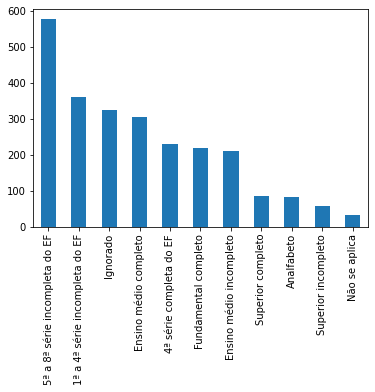

In [22]:
dados['CS_ESCOL_N_NOVO'].value_counts().plot(kind='bar')

Usando o pacote seaborn

In [23]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


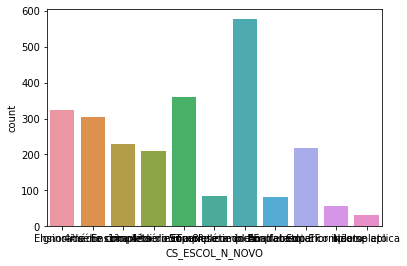

In [24]:
sns.countplot(dados['CS_ESCOL_N_NOVO'])

Neste caso, estamos trabalhando com uma variável **categórica ordinal**, ou seja, são classes que possuem alguma hierarquia. Superior completo é maior que Superior incompleto e assim sucessivamente.

Assim, pode ser interessante modificarmos a ordem dessas variáveis.

In [25]:
ordem = ['Analfabeto', 'Ignorado', 'Não se aplica',
         '1ª a 4ª série incompleta do EF', '4ª série completa do EF', 
         '5ª a 8ª série incompleta do EF', 'Fundamental completo',
         'Ensino médio incompleto', 'Ensino médio completo',
         'Superior incompleto', 'Superior completo']

In [26]:
import matplotlib.pyplot as plt

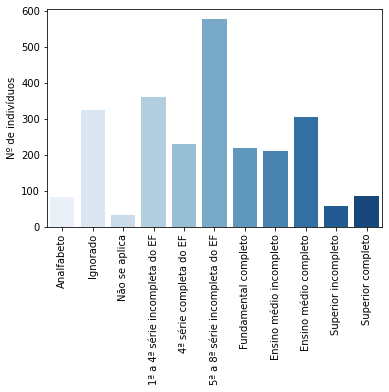

In [27]:
# Modificando a ordem das colunas e trocando a cor dos gráficos
sns.countplot(x=dados['CS_ESCOL_N_NOVO'], order=ordem,
              palette='Blues')
# Modificando a rotação das legendas
plt.xticks(rotation=90)
# Modificando os nomes do eixos
plt.ylabel('Nº de indivíduos')
plt.xlabel('');

# Exercícios

1- Faça novamente cada um dos passos que fizemos em aula;

## Analise a variável `FORMA`
1. Verifique quais são as classes presentes na variável;
2. Faça as substituições (usando `replace/map`) de acordo com o encontrado neste [link](https://github.com/souzajvp/teaching-python/blob/main/Ficha%20de%20notif.pdf);
3. Faça um gráfico de barras para mostrar a quantidade de pacientes que tiveram cada forma;
4. Me envie um link com a análise pronta!